<a href="https://colab.research.google.com/github/ApahSaroj/WPI/blob/main/WPI_pred_Time_Series_split_%26_LGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/DATA/timeser.csv')
df.dropna(inplace=True)

df


,Date,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,01-Jan-14,8.14,8.7,84.0,52,147.8,4.48,44,20,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
1,02-Jan-14,7.70,8.8,110.0,76,188.0,8.61,44,36,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2,03-Jan-14,7.60,7.5,75.0,44,128.0,8.11,28,20,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
3,04-Jan-14,8.20,9.1,76.0,56,127.0,6.30,44,18,1.65,0.396,9.60,0.299591,2.238750,0.01536,0.219282
4,05-Jan-14,7.31,7.3,84.0,52,140.0,5.50,28,20,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,28-Apr-15,7.60,5.6,224.0,8,370.0,16.14,92,24,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
483,29-Apr-15,7.30,5.6,266.0,96,434.0,20.56,96,32,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
484,30-Apr-15,5.10,5.8,290.0,12,487.0,37.35,60,44,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811
485,01-May-15,7.40,6.4,230.0,72,385.0,20.06,70,42,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970


In [3]:
df.columns

Index(['Date', 'pH', 'DO', 'TDS', 'Alkalinity', 'EC', 'Na', 'Ca', 'Mg', 'K',
       'F', 'Cl', 'Nitrate', 'Sulphate', 'Phosphate', 'WPI'],
      dtype='object')

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df

,Date,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,2014-01-01,8.14,8.7,84.0,52,147.8,4.48,44,20,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
1,2014-01-02,7.70,8.8,110.0,76,188.0,8.61,44,36,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2,2014-01-03,7.60,7.5,75.0,44,128.0,8.11,28,20,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
3,2014-01-04,8.20,9.1,76.0,56,127.0,6.30,44,18,1.65,0.396,9.60,0.299591,2.238750,0.01536,0.219282
4,2014-01-05,7.31,7.3,84.0,52,140.0,5.50,28,20,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,2015-04-28,7.60,5.6,224.0,8,370.0,16.14,92,24,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
483,2015-04-29,7.30,5.6,266.0,96,434.0,20.56,96,32,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
484,2015-04-30,5.10,5.8,290.0,12,487.0,37.35,60,44,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811
485,2015-05-01,7.40,6.4,230.0,72,385.0,20.06,70,42,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970


In [6]:
all_corr = df.corr().abs()['WPI'].sort_values(ascending = False)
all_corr

WPI           1.000000
Phosphate     0.873994
EC            0.513956
TDS           0.508326
F             0.478907
Ca            0.462190
Sulphate      0.437575
Na            0.437277
Cl            0.432111
K             0.376962
Nitrate       0.342504
Mg            0.331117
Alkalinity    0.306938
DO            0.087564
pH            0.004190
Name: WPI, dtype: float64

In [7]:
corr_drop = all_corr[all_corr < 0.35]
corr_drop

Nitrate       0.342504
Mg            0.331117
Alkalinity    0.306938
DO            0.087564
pH            0.004190
Name: WPI, dtype: float64

In [8]:
to_drop = list(corr_drop.index)
df2 = df.drop(to_drop, axis = 1)
df2.head()

,Date,TDS,EC,Na,Ca,K,F,Cl,Sulphate,Phosphate,WPI
0,2014-01-01,84.0,147.8,4.48,44,1.17,0.285,7.8,6.534660,0.06211,0.249528
1,2014-01-02,110.0,188.0,8.61,44,3.46,0.401,14.8,8.138620,0.00960,0.216400
2,2014-01-03,75.0,128.0,8.11,28,2.80,0.379,14.8,3.855625,0.01280,0.183814
3,2014-01-04,76.0,127.0,6.30,44,1.65,0.396,9.6,2.238750,0.01536,0.219282
4,2014-01-05,84.0,140.0,5.50,28,1.61,0.265,8.3,5.600000,0.01000,0.165831


In [9]:
df2 = df2.set_index("Date")
df2

,TDS,EC,Na,Ca,K,F,Cl,Sulphate,Phosphate,WPI
Date,,,,,,,,,,
2014-01-01,84.0,147.8,4.48,44,1.17,0.285,7.80,6.534660,0.06211,0.249528
2014-01-02,110.0,188.0,8.61,44,3.46,0.401,14.80,8.138620,0.00960,0.216400
2014-01-03,75.0,128.0,8.11,28,2.80,0.379,14.80,3.855625,0.01280,0.183814
2014-01-04,76.0,127.0,6.30,44,1.65,0.396,9.60,2.238750,0.01536,0.219282
2014-01-05,84.0,140.0,5.50,28,1.61,0.265,8.30,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...
2015-04-28,224.0,370.0,16.14,92,7.60,2.270,23.04,104.480000,0.01500,0.419630
2015-04-29,266.0,434.0,20.56,96,9.89,1.550,30.86,61.068000,0.03300,0.432996
2015-04-30,290.0,487.0,37.35,60,14.80,0.159,60.13,89.910000,0.16300,0.326811


In [10]:
import matplotlib.pyplot as plt

titles = ['TDS',	'EC',	'Na',	'Ca',	'K',	'F',	'Cl',	'Sulphate',	'Phosphate',	'WPI' ]
feature_keys = ['TDS',	'EC',	'Na',	'Ca',	'K',	'F',	'Cl',	'Sulphate',	'Phosphate',	'WPI']

colors = [ "blue","orange","green","red","purple","brown","pink","gray","olive", "cyan"]

date_time_key = "Date"

def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=7, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()

  
    

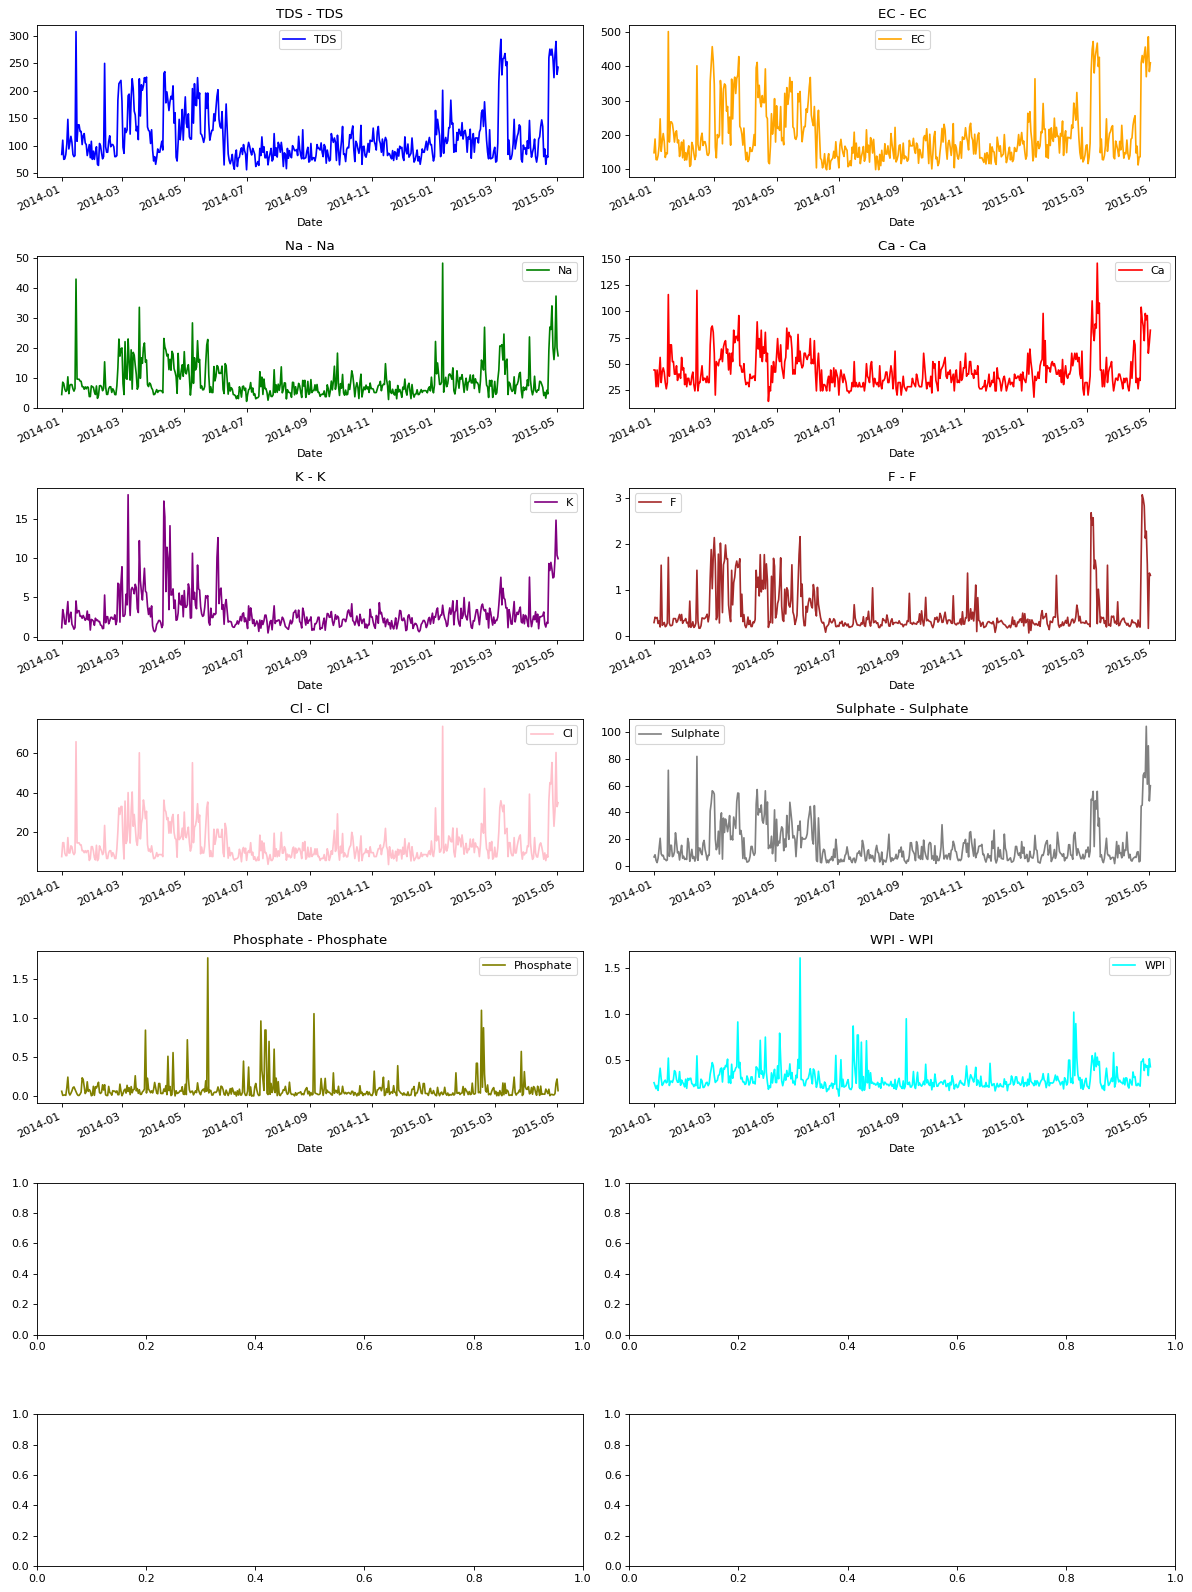

In [11]:
show_raw_visualization(df)

In [12]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 6)
X = df2.drop(['WPI'], axis = 1)
y = df2['WPI']

In [13]:
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [14]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

model = LGBMRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [15]:
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

from numpy import mean
from numpy import std
print('Negative MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Negative MAE: -0.029 (0.009)


In [16]:
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
from sklearn.metrics import mean_absolute_error
print("The Mean Absolute error is: ", mean_absolute_error(y_test, y_pred))

The Mean Absolute error is:  0.027336066888812037


In [17]:
model.score(X_test, y_test)

0.8382659450960906

In [18]:
model.score(X_train, y_train)

0.8803503660881935

In [19]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result

,Actual,Predicted
Date,,
2015-02-23,0.186831,0.192438
2015-02-24,0.285198,0.276973
2015-02-25,0.177494,0.181381
2015-02-26,0.208506,0.208336
2015-02-27,0.269451,0.266760
...,...,...
2015-04-28,0.419630,0.414666
2015-04-29,0.432996,0.390496
2015-04-30,0.326811,0.438598


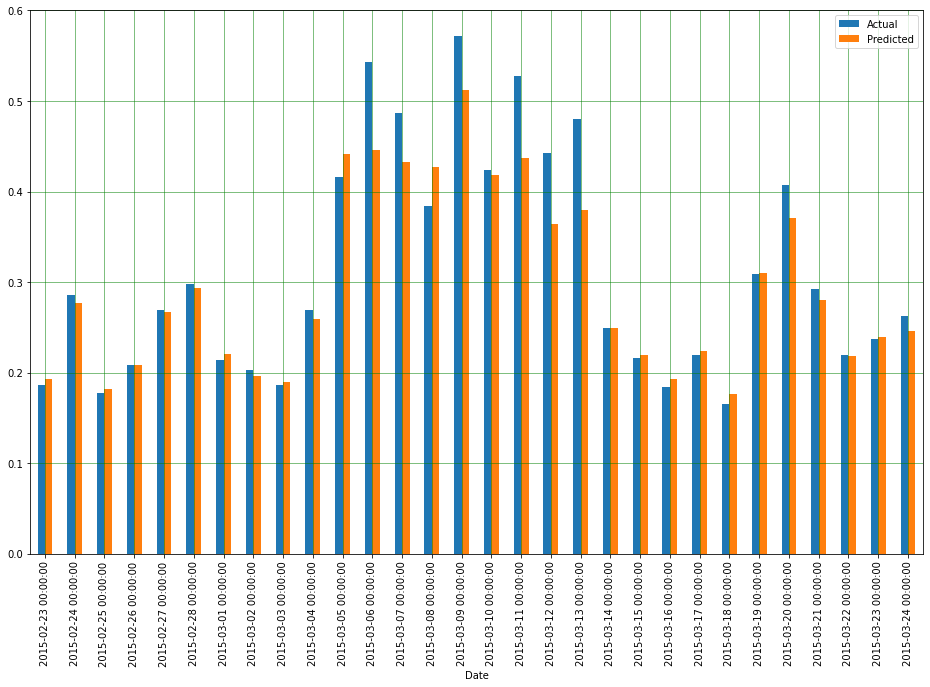

In [20]:
result_plot = result.head(30)
result_plot.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Lets consider the data without considering correlation

In [21]:
df3=df
df3 = df3.set_index("Date")
df3

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
Date,,,,,,,,,,,,,,,
2014-01-01,8.14,8.7,84.0,52,147.8,4.48,44,20,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
2014-01-02,7.70,8.8,110.0,76,188.0,8.61,44,36,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2014-01-03,7.60,7.5,75.0,44,128.0,8.11,28,20,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
2014-01-04,8.20,9.1,76.0,56,127.0,6.30,44,18,1.65,0.396,9.60,0.299591,2.238750,0.01536,0.219282
2014-01-05,7.31,7.3,84.0,52,140.0,5.50,28,20,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-28,7.60,5.6,224.0,8,370.0,16.14,92,24,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
2015-04-29,7.30,5.6,266.0,96,434.0,20.56,96,32,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
2015-04-30,5.10,5.8,290.0,12,487.0,37.35,60,44,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811


In [22]:
from sklearn.model_selection import TimeSeriesSplit

tss1 = TimeSeriesSplit(n_splits = 6)
X = df3.drop(['WPI'], axis = 1)
y = df3['WPI']

In [23]:
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [24]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

model = LGBMRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [25]:
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

from numpy import mean
from numpy import std
print('Negative MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Negative MAE: -0.023 (0.009)


In [26]:
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
from sklearn.metrics import mean_absolute_error
print("The Mean Absolute error is: ", mean_absolute_error(y_test, y_pred))

The Mean Absolute error is:  0.023592468274540996


In [27]:
model.score(X_test, y_test)

0.8176633751512095

In [28]:
model.score(X_train, y_train)

0.8937909804894413

In [29]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result

,Actual,Predicted
Date,,
2015-02-23,0.186831,0.188131
2015-02-24,0.285198,0.281483
2015-02-25,0.177494,0.175577
2015-02-26,0.208506,0.207949
2015-02-27,0.269451,0.275815
...,...,...
2015-04-28,0.419630,0.418115
2015-04-29,0.432996,0.408108
2015-04-30,0.326811,0.395017


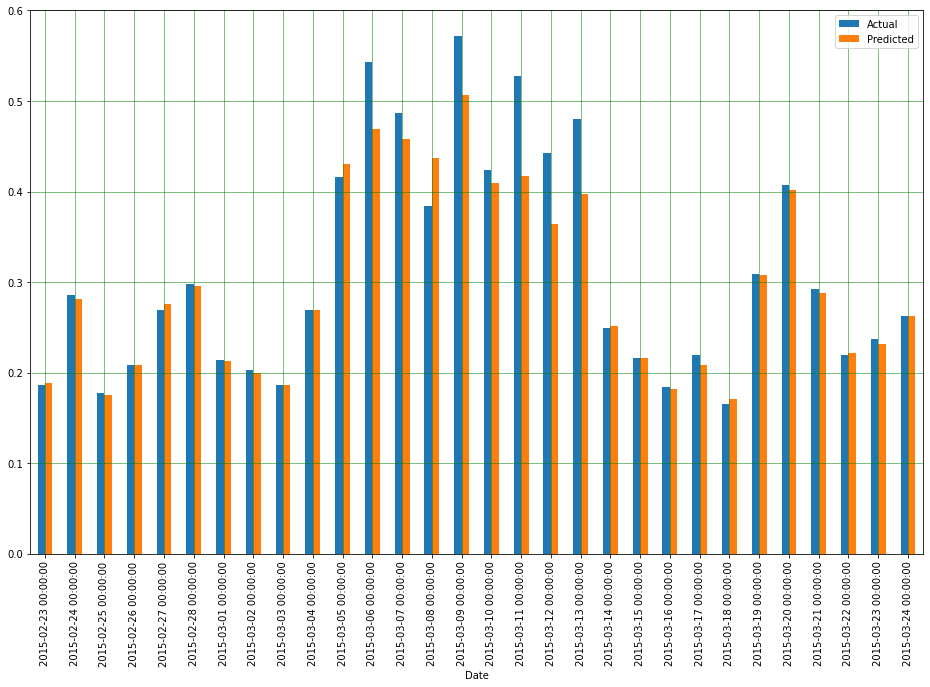

In [30]:
result_plot = result.head(30)
result_plot.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()